In [58]:
# Importing all the necessary Libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [59]:
# Reading the dataset from the system 

dataset_path = "/Users/gaurang/Desktop/CIND_820/online_transactions.csv"

df = pd.read_csv(dataset_path)

df.head() 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Initial Analysis

In [60]:
# Calculating the number of rows and columns in the dataset

num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}") 

Number of rows: 6362620
Number of columns: 11


In [61]:
# Summary Statistics of the DataFrame

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [62]:
# Checking the datatypes of all the variables 

print(df.dtypes) 

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [63]:
# Converting the 'isFraud' column into class variable 'Class'
df['Class'] = df['isFraud'].map({0: 'Non-Fraudulent', 1: 'Fraudulent'})

# Dropping the original 'isFraud' column if the 'Class' column is sufficient
df.drop('isFraud', axis=1, inplace=True) 

### The transformation of the 'isFraud' column from numeric (with values 0 and 1) to a class variable is essentially to establish its role as the target or dependent variable in a classification problem, particularly in the context of fraud detection.

In [64]:
# Printing the data types again to check the validity of the changes made earlier

print(df.dtypes) 

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
Class              object
dtype: object


In [65]:
# Checking the dataset for any missing or null values (If the answer is True, that means there are missing values and vice versa) 

df.isna().any().any()

False

In [66]:
# Another way to check for any missing or null values (this will give us the number of missing or null values in each column, if any)

df.isnull().sum() 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
Class             0
dtype: int64

In [67]:
# Checking for any duplicate rows and removing them, if any

df.drop_duplicates

<bound method DataFrame.drop_duplicates of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
0             160296.36  M1979787155            0.00            0.00   
1       

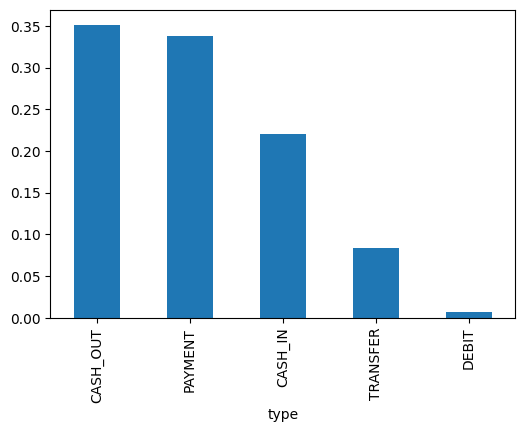

In [68]:
# Plotting a histogram to get the different categories and their frequency distibution in the "type" column

fig = plt.figure(figsize =(6, 4))
df['type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [69]:
# Checking the number of transactions in each type

df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

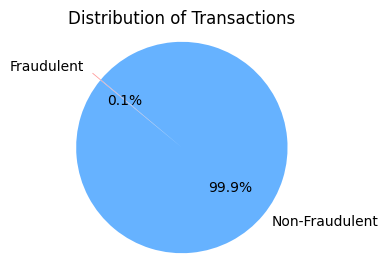

In [70]:
# Creating a Pie Chart to display the distribution of Fradulent and Non-fradulent transactions

# Counting the number of fraudulent and non-fraudulent transactions
fraudulent_count = (df['Class'] == 'Fraudulent').sum()
non_fraudulent_count = (df['Class'] == 'Non-Fraudulent').sum()

# Creating a list of counts
transaction_counts = [fraudulent_count, non_fraudulent_count]

# Labels for the two categories
labels = ['Fraudulent', 'Non-Fraudulent']

# Colors for the two categories
colors = ['#FF9999', '#66B2FF']

# Explode a slice if it is fraudulent
explode = (0.1, 0)

# Creating the pie chart
plt.figure(figsize=(3, 3))
plt.pie(transaction_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the pie chart
plt.show()



### The Pie chart shows that 99.9% transactions are Non-Fradulent and only 0.1% of the transactions are Fradulent. This shows that the dataset is highly imbalanced. Therefore, we will have to deal with that in the Experimental Design phase.

In [71]:
# Checking the number of Fraud and notFraud transactions

df['Class'].value_counts()

Class
Non-Fraudulent    6354407
Fraudulent           8213
Name: count, dtype: int64

# Exploratory Analysis

In [72]:
# Removing the irrelevant columns from the dataset (Sub-setting)

new_df = df.drop(['isFlaggedFraud','nameOrig','nameDest'], axis = 1)

### The removal of these columns was based on their perceived lack of alignment with the primary objective of detecting fraudulent activities in credit card transactions. The decision was made to streamline the dataset, focusing on features more likely to aid in the accurate identification of fraudulent behavior.

### Note: This is not a part of Dimensionality Reduction. This is usually based of the domain knowledge and aim of the project.

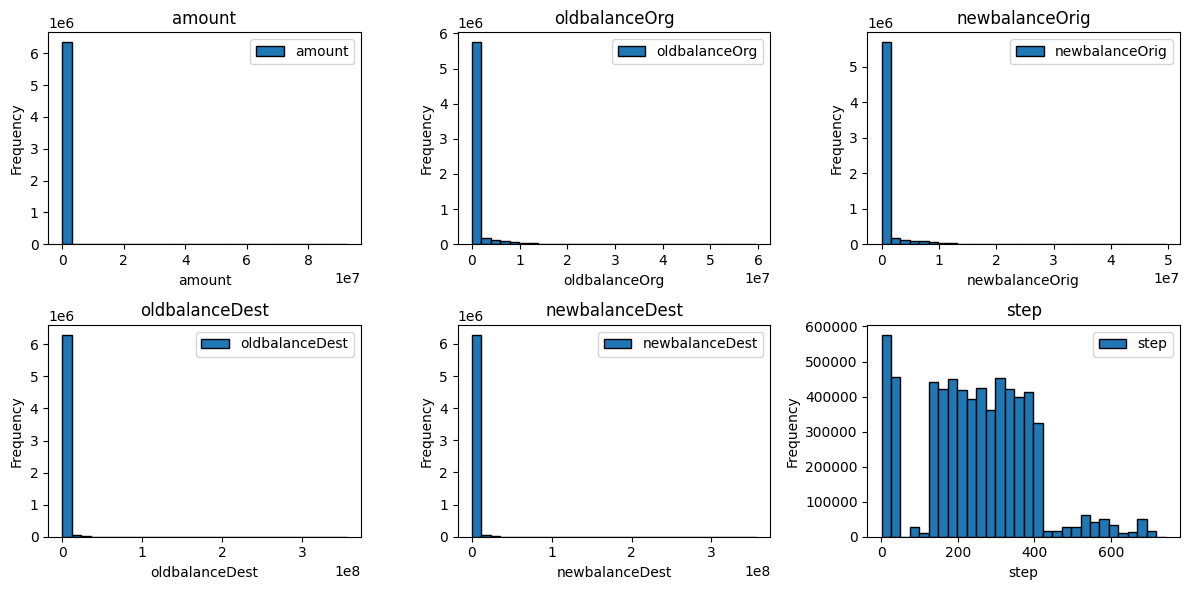

In [73]:
# Plotting Histograms to better understand the numeric variables

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# List of numeric columns to create histograms for
numeric_columns = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "step"]

# Creating histograms for each numeric variable
for i, col in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3]
    df[col].plot(kind="hist", bins=30, ax=ax, edgecolor='k', legend=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjusting the layout
plt.tight_layout()
plt.show()


### The histograms of the dataset reveal left-skewed data distributions. To ensure optimal performance, normalization will be necessary, especially for logistic regression, which benefits from normalized data due to optimization algorithms. While decision tree and random forest models aren't highly sensitive to data scale, using normalized data could potentially enhance their results. As a result, normalization will be conducted later to improve the overall modeling process.

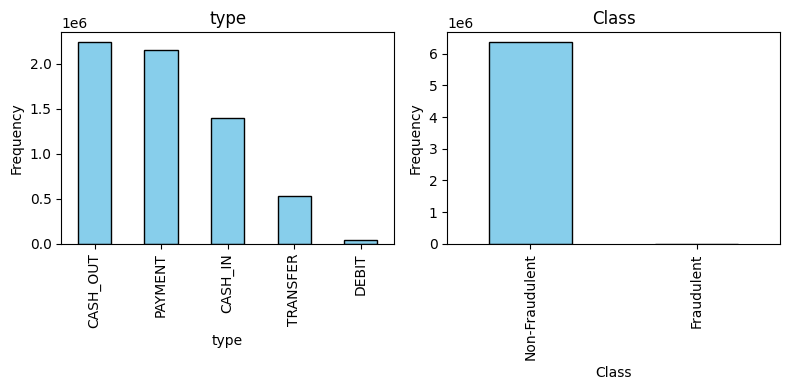

In [74]:
# Plotting Bar Charts to better understand the Categorical variables

# Categorical columns to create bar charts for
categorical_columns = ['type', 'Class']

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(8, 4))

# Creating bar charts for each categorical variable
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    counts = df[col].value_counts()
    counts.plot(kind="bar", ax=ax, color="skyblue", edgecolor='k', legend=False)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjusting the layout
plt.tight_layout()
plt.show()


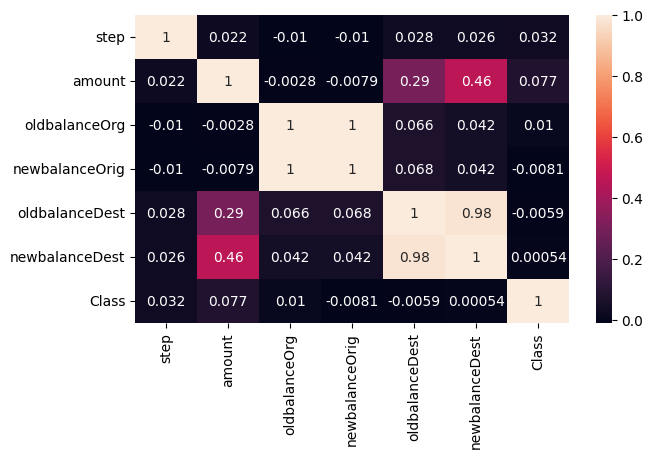

In [75]:
# Checking the Correlation of each variable with the Class variable

# Converting the 'Class' column to numeric
new_df['Class'] = new_df['Class'].map({'Non-Fraudulent': 0, 'Fraudulent': 1})

# Creating a copy of the DataFrame excluding non-numeric columns (if any)
correlationdata = new_df.select_dtypes(include=[np.number])

# Plotting the correlation heatmap
fig = plt.figure(figsize=(7, 4))
sns.heatmap(correlationdata.corr(), annot=True)
plt.show()

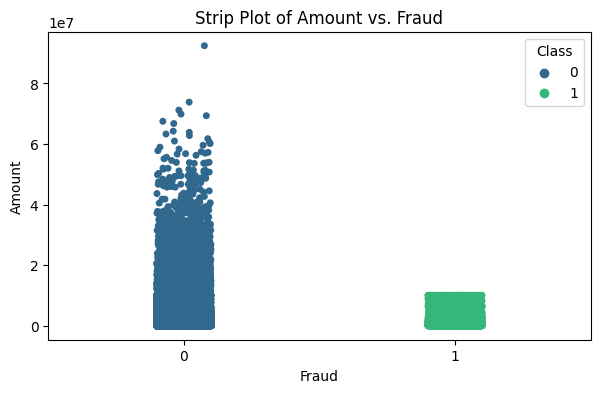

In [38]:
# Visualizing relationship between transaction amounts and whether they are fraud or not
# Using stripplot to visualize relationship between 'amount' and 'Class'

plt.figure(figsize=(7, 4))
sns.stripplot(data=new_df, x='Class', y='amount', hue='Class', palette='viridis', jitter=True)
plt.title('Strip Plot of Amount vs. Fraud')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.show()


### The strip plot visualization reveals a clear trend: all fraudulent transactions in the dataset are linked to smaller transaction amounts. This observation underscores the potential significance of lower transaction amounts as a key feature in identifying fraudulent activities within the dataset, offering valuable insights for fraud detection.

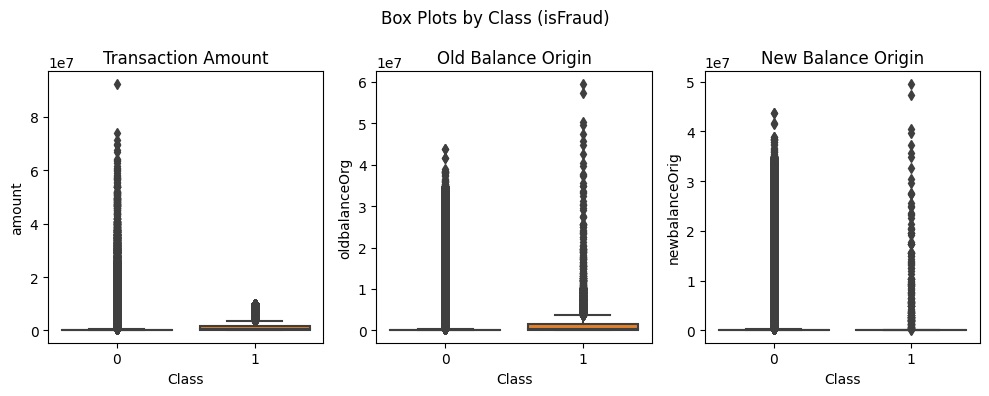

In [76]:
# Generating box plots for the 'amount,' 'oldbalanceOrg,' and 'newbalanceOrig' features, each broken down by whether the transactions are fraudulent or not ('isFraud')

# Setting the figure size
plt.figure(figsize=(10, 4))

# Creating box plots for 'amount', 'oldbalanceOrg', and 'newbalanceOrig' by 'Class' (isFraud)
plt.subplot(1, 3, 1)
sns.boxplot(x='Class', y='amount', data=new_df)
plt.title('Transaction Amount')

plt.subplot(1, 3, 2)
sns.boxplot(x='Class', y='oldbalanceOrg', data=new_df)
plt.title('Old Balance Origin')

plt.subplot(1, 3, 3)
sns.boxplot(x='Class', y='newbalanceOrig', data=new_df)
plt.title('New Balance Origin')

# Adding a title to the overall figure
plt.suptitle('Box Plots by Class (isFraud)')

# Adjusting the layout
plt.tight_layout()

# Showing the plots
plt.show()


### The box plot highlights potential outliers in the data, suggesting an unbalanced distribution between fraudulent and non-fraudulent transactions. Although the presence of outliers is identified, due to the scarcity of fraud cases, no direct outlier removal is proposed, as it could further limit the already sparse number of fraud transactions. Subsequent outlier handling should consider this class imbalance and is planned for a later stage in the analysis.

# Dimensionality Reduction

In [77]:
# Encoding 'type' column using one-hot encoding method

data = pd.get_dummies(data = new_df,columns = ['type'])
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Class,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


### One-hot encoding the 'type' variable was done to ensure compatibility with logistic regression, which requires numerical inputs. While decision trees and random forests can handle categorical data directly, logistic regression specifically needs numerical features. The true/false values resulting from one-hot encoding are treated as binary (0 and 1), which suits logistic regression's requirements while allowing the data to be used across all three models effectively.

In [78]:
# Robust Scaling of the Entire Dataset using RobustScaler (Normalizing)

rscaler = RobustScaler()
scaled_data = rscaler.fit_transform(data)
data_sc = pd.DataFrame(scaled_data, columns = data.columns)

data_sc.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Class,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0.0,0.0,0.0,0.0,1.0,0.0


### In handling this dataset, robust scaling was chosen for normalization. Given the limited amount of fraud data, traditional outlier removal methods might lead to the loss of important information in the already sparse fraudulent transactions. Robust scaling was preferred as it's less sensitive to outliers, enabling normalization while preserving the integrity of the fraud-related data.

In [79]:
# Checking unique values in the 'Class' column

unique_classes = data_sc['Class'].unique()
print(unique_classes)

[0. 1.]


### We can see that our Class variable and a few other variables are converted from Binary Integer format to Float format. This is because of Robust Scaling. The RobustScaler, used for scaling data, standardizes features, and is robust to outliers. When applied, it converts integer variables like '0' and '1' to floating-point numbers ('0.0' and '1.0'). Despite the change in data type, these float representations maintain the original categorical information—the values '0.0' and '1.0' still represent the same categories as '0' and '1', ensuring the integrity of the binary classification.

### Even though the float numbers represent the binary class, we will still change the float numbers to integers to avoid any confusion since the original dataset was also in Binary Integer format.

In [80]:
# Converting the columns from float to integer

data_sc['Class'] = data_sc['Class'].astype(int)
data_sc['type_CASH_OUT'] = data_sc['type_CASH_OUT'].astype(int)
data_sc['type_DEBIT'] = data_sc['type_DEBIT'].astype(int)
data_sc['type_PAYMENT'] = data_sc['type_PAYMENT'].astype(int)
data_sc['type_TRANSFER'] = data_sc['type_TRANSFER'].astype(int)

In [81]:
# Verifying the change

data_sc.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Class,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0,0.0,0,0,1,0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0,0.0,0,0,1,0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1,0.0,0,0,0,1
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1,0.0,1,0,0,0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0,0.0,0,0,1,0


In [82]:
# Counting the number of Fradulent transactions in each transaction type

# List of the newly created type variables after one-hot encoding
new_type_columns = ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'type_CASH_IN']
 
# Counting the number of fraud (1) and non-fraud (0) transactions for each new variable
for column in new_type_columns:
    fraud_count = data_sc[data_sc[column] == 1]['Class'].sum()  # Number of fraud transactions
    non_fraud_count = len(data_sc[data_sc[column] == 0]) - fraud_count  # Number of non-fraud transactions
    print(f"Variable: {column}")
    print(f"Fraudulent transactions: {fraud_count}")
    print(f"Non-fraudulent transactions: {non_fraud_count}\n")


Variable: type_CASH_OUT
Fraudulent transactions: 4116
Non-fraudulent transactions: 4121004

Variable: type_DEBIT
Fraudulent transactions: 0
Non-fraudulent transactions: 6321188

Variable: type_PAYMENT
Fraudulent transactions: 0
Non-fraudulent transactions: 4211125

Variable: type_TRANSFER
Fraudulent transactions: 4097
Non-fraudulent transactions: 5825614

Variable: type_CASH_IN
Fraudulent transactions: 0
Non-fraudulent transactions: 4963336



### The analysis conducted involved counting the number of fraudulent and non-fraudulent transactions within each transaction type, breaking down the fraud occurrences based on different transaction categories. This analysis aimed to explore how fraud incidents are distributed across various transaction types.

In [83]:
# No-Model Prediction

# Defining a simple rule to predict all transactions as non-fraudulent (0)
predicted_labels = [0] * len(data_sc)

# True labels from the 'Class' column
true_labels = data_sc['Class']

# Creating a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)



Confusion Matrix:
[[6354407       0]
 [   8213       0]]
Accuracy: 0.9987091795518198


### The no-model evaluation was conducted to establish a baseline performance and to gain insights into the inherent distribution of the 'Class' variable within the dataset. A simple rule was applied to predict all transactions as non-fraudulent (0) without leveraging any model or feature analysis.

### The resulting confusion matrix displayed a high accuracy of 99.87%. This accuracy signifies that the no-model prediction aligned perfectly with the existing distribution of the 'Class' variable, correctly assigning the majority class label to the instances.

### The purpose of this evaluation was to provide a preliminary understanding of the class distribution and to set a baseline for subsequent model assessments. The high accuracy in the no-model prediction suggests that the dataset predominantly consists of non-fraudulent transactions. However, it does not imply the effectiveness of the model or the impact of feature engineering; rather, it confirms that the original class distribution was replicated through a simple, rule-based prediction method. This baseline helps in comparing and evaluating the performance of subsequent models and analyses in the context of fraud detection.

In [84]:
# Performing Chi-squared Test on categorical variables

# Subset the relevant columns for the contingency table
subset = data_sc[['Class', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]

# Create a contingency table
contingency_table = pd.crosstab(subset['Class'], [subset['type_CASH_OUT'], subset['type_DEBIT'], subset['type_PAYMENT'], subset['type_TRANSFER']])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared statistic: {chi2}") 
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)


Chi-squared statistic: 22082.535713191082
P-value: 0.0
Degrees of freedom: 4
Expected frequencies table:
[[1.39747778e+06 5.32221110e+05 2.14871781e+06 4.13785187e+04
  2.23461179e+06]
 [1.80622440e+03 6.87889834e+02 2.77719374e+03 5.34812728e+01
  2.88821075e+03]]


### The low p-value and the significant chi-squared statistic suggest a strong association between the 'Class' variable and the 'type_' variables. It indicates that the 'type_' variables are not independent of the 'Class' variable, meaning that the transaction type ('type_') is associated with the occurrence of fraud ('Class').

In [85]:
# Performing ANVOVA Test on numeric variables

# Select the columns for the ANOVA test
selected_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Perform ANOVA
f_statistic, p_value = f_oneway(*[data_sc[column] for column in selected_columns])

print(f'ANOVA F-Statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')

ANOVA F-Statistic: 300794.9628888012
ANOVA p-value: 0.0


### The ANOVA output indicates a highly significant difference among the means of the variables being analyzed. The extremely low p-value and the large F-statistic value suggest that at least one of the means among the selected variables is significantly different from the others. This indicates a substantial statistical difference in the group means, implying that these variables have a strong association with the class distribution (fraudulent vs. non-fraudulent transactions)

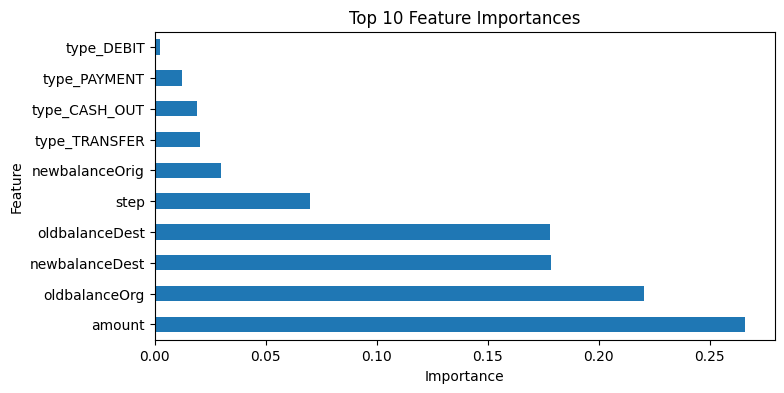

In [86]:
# Using Random Forest Classifier to determine feature importances. 
# Assuming 'Class' is the target variable and the rest are features
X = data_sc.drop('Class', axis=1).head(100000)
y = data_sc['Class'].head(100000)

# Creating and fitting a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Getting feature importances
feature_importances = model.feature_importances_
features = X.columns

# Creating a Series with feature importances
feature_importance_series = pd.Series(feature_importances, index=features)

# Sorting feature importances in descending order
feature_importance_series = feature_importance_series.sort_values(ascending=False)

# Plotting the top 'n' most important features
n = 10  # Setting the number of features to display
plt.figure(figsize=(8, 4))
feature_importance_series.head(n).plot(kind='barh')
plt.title(f'Top {n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show() 

In [87]:
# Extracting information about the occurrence of fraud at different times of the day

# Assuming 'step' is a string representing time
data_sc['step'] = pd.to_datetime(data_sc['step'])

# Filtering fraudulent transactions
fraudulent_data = data_sc[data_sc['Class'] == 1]

# Grouping by hour and counting fraudulent transactions
fraud_by_hour = fraudulent_data['step'].dt.hour.value_counts()

# Identifying the hour with the most fraud occurrences
peak_fraud_hour = fraud_by_hour.idxmax()
max_fraud_count = fraud_by_hour.max()

print(f"The peak hour for fraud occurrences is at {peak_fraud_hour}:00 with {max_fraud_count} fraud transactions.") 

The peak hour for fraud occurrences is at 0:00 with 7499 fraud transactions.


# Experimental Design

In [88]:
# Splitting data into features (X) and target variable (y)

X = data_sc.drop('Class', axis=1)  # Features 
y = data_sc['Class']  # Target variable

# Using random sampling to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [89]:
# Checking the class distribution in the original data
original_class_distribution = data_sc['Class'].value_counts(normalize=True)
print("Original Class Distribution:")
print(original_class_distribution)

# Checking the class distribution in the training set
training_class_distribution = y_train.value_counts(normalize=True)
print("\nTraining Set Class Distribution:")
print(training_class_distribution)

# Checking the class distribution in the test set
test_class_distribution = y_test.value_counts(normalize=True)
print("\nTest Set Class Distribution:")
print(test_class_distribution)


Original Class Distribution:
Class
0    0.998709
1    0.001291
Name: proportion, dtype: float64

Training Set Class Distribution:
Class
0    0.998705
1    0.001295
Name: proportion, dtype: float64

Test Set Class Distribution:
Class
0    0.998727
1    0.001273
Name: proportion, dtype: float64


In [90]:
# Applying SMOTE to the training set

# Converting the 'step' column to integer
X_train['step'] = X_train['step'].astype(int) 

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

### SMOTE is a method used to address imbalanced datasets, especially in cases like credit card fraud detection, where instances of fraud are infrequent compared to non-fraudulent transactions. By generating synthetic instances for the minority class (fraudulent transactions), it rebalances the dataset, helping machine learning models to better learn from a more balanced dataset. This step is performed on the training set to prevent the model from learning synthetic patterns from the test set, ensuring its generalization ability.

In [91]:
# Initializing Time Series Split
time_series_cv = TimeSeriesSplit(n_splits=5)

# Random Forest model
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=time_series_cv, scoring='accuracy')
print("Random Forest Time Series Cross-validation scores:")
print(rf_scores)
print(f"Average Accuracy: {rf_scores.mean()}\n")

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_model, X_train_resampled, y_train_resampled, cv=time_series_cv, scoring='accuracy')
print("Decision Tree Time Series Cross-validation scores:")
print(dt_scores)
print(f"Average Accuracy: {dt_scores.mean()}\n")

# Logistic Regression model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) 

lr_model = LogisticRegression(max_iter=1000000)
lr_scores = cross_val_score(lr_model, X_train_resampled_scaled, y_train_resampled, cv=time_series_cv, scoring='accuracy')
print("Logistic Regression Time Series Cross-validation scores:")
print(lr_scores)
print(f"Average Accuracy: {lr_scores.mean()}\n")

Random Forest Time Series Cross-validation scores:
[0.9996648  0.99968191 0.83272303 0.99940218 0.99967365]
Average Accuracy: 0.9662291140577668

Decision Tree Time Series Cross-validation scores:
[0.99963529 0.99968545 0.90138513 0.99913426 0.99950192]
Average Accuracy: 0.9798684096379997

Logistic Regression Time Series Cross-validation scores:
[0.99918855 0.99923635 0.4452178  0.89101983 0.93283155]
Average Accuracy: 0.8534988176460209



### The cross-validation results demonstrate the average accuracy of different models. Each model's accuracy was assessed using various subgroups of the training data to provide a more robust evaluation. The outcomes show that Random Forest and Decision Tree models exhibit higher accuracy than the Logistic Regression model. 

# Modelling

### In the project, the approach involves building three models—Random Forest, Decision Tree, and Logistic Regression—followed by their evaluation using untouched test data to ensure an unbiased performance assessment. Given the high accuracy observed for all models, it's beneficial to construct each model and thoroughly evaluate them.

In [40]:
# Initializing the Random Forest model
random_forest_model = RandomForestClassifier()

# Training the model using the training data
random_forest_model.fit(X_train_resampled, y_train_resampled) 

RandomForestClassifier()

In [41]:
# Initializing the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fitting the model to the training data
decision_tree_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [45]:
# Creating the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000000)

# Fitting the model on the training data
logistic_model.fit(X_train_resampled_scaled, y_train_resampled)

LogisticRegression(max_iter=1000000)

# Evaluation

In [48]:
# Predicting the target values using the Random Forest model

X_test['step'] = pd.to_numeric(X_test['step'])  


# Evaluating on test data
y_pred = random_forest_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Accuracy: 0.9991395054238663
Precision: 0.6026593664450528
Recall: 0.9512345679012346
F1 Score: 0.7378501316734499


In [49]:
# Random Forest Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1269888    1016]
 [     79    1541]]


In [50]:
# Predicting the target values using the Decision Tree model

# Evaluating on test data
y_pred = decision_tree_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Accuracy: 0.9993422520911197
Precision: 0.6630570595585172
Recall: 0.9827160493827161
F1 Score: 0.7918428251678686


In [51]:
# Decision Tree Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1270095     809]
 [     28    1592]]


In [52]:
# Predicting the target values using the Logistic Regression model

# Evaluating on test data
y_pred = logistic_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.6558728951281076
Precision: 0.003432687010876246
Recall: 0.9308641975308642
F1 Score: 0.006840150047853834


In [53]:
# Logistic Regression Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[833106 437798]
 [   112   1508]]


In [54]:
# Calculating AUC and plotting ROC curve

# Random Forest model
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Decision Tree model
dt_probs = decision_tree_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# Logistic Regression model
lr_probs = logistic_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Print AUC for each model
print(f"Random Forest AUC: {rf_auc}")
print(f"Decision Tree AUC: {dt_auc}")
print(f"Logistic Regression AUC: {lr_auc}")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Random Forest AUC: 0.9985662946596661
Decision Tree AUC: 0.9910397473077004
Logistic Regression AUC: 0.8458312909453856


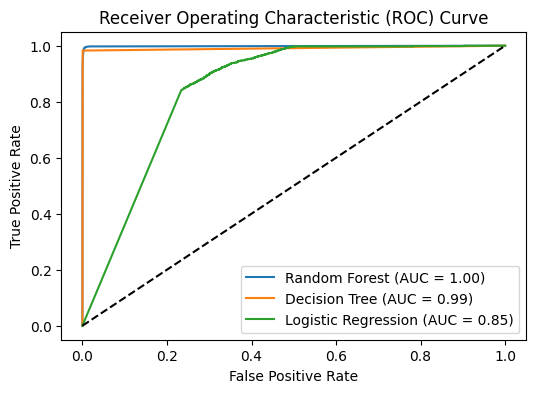

In [55]:
# Plotting ROC curves for all three models
plt.figure(figsize=(6, 4))

# Random Forest
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

# Decision Tree
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')

# Logistic Regression
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')

# Plotting the ROC curve for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
